In [19]:

from utils.data_loader import load_mnist_classifier, load_MNISTdata, loader_to_data
from models import SNGAN
from training.train_GAN import train_DiaGAN, train_BasicGAN, apply_DRS
from evaluation.evaluate_BasicGAN import generate_BasicGAN, evaluate_gan

In [20]:
classifier = load_mnist_classifier()

C:\Users\sarpg\OneDrive\Masaüstü\Generative Neural Networks\DiaGAN-Project\src\utils\data_loader.py:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(

In [ ]:
train_loader, test_loader = load_MNISTdata()
X_mnist = loader_to_data(train_loader)

Loaded: (60000, 1, 28, 28)


Basic

In [22]:
G = SNGAN.Generator(z_dim=100, img_channels=1)
D = SNGAN.Discriminator(img_channels=1)

trained_G = train_BasicGAN(
    generator=G,
    discriminator=D,
    dataloader=train_loader,
    lr=0.0002,
    latent_dim=100,
    n_epochs=6  
)

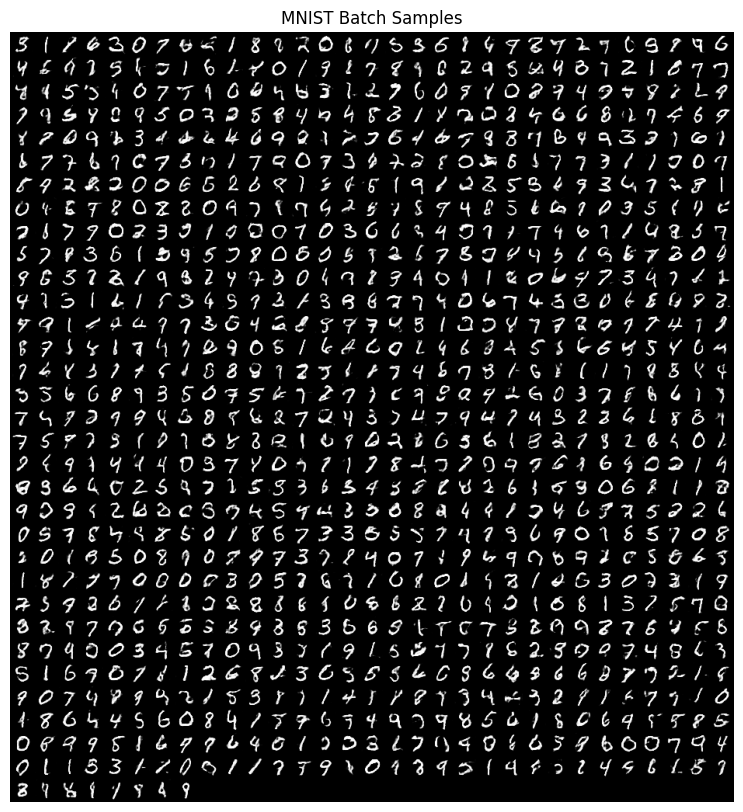

In [23]:
gen_images=generate_BasicGAN(G, num_samples=1000, plotit=True)

In [24]:
results = {}
results["BasicGAN"] = evaluate_gan(gen_images, classifier, real_data=X_mnist[:1000])
results["BasicGAN"]

C:\Users\sarpg\OneDrive\Masaüstü\Generative Neural Networks\DiaGAN-Project\src\evaluation\evaluate_BasicGAN.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(data[i:i+batch_size], dtype=torch.float32, device=device)


{'Precision': np.float64(0.296),
 'Recall': np.float64(0.292),
 'FID': np.float64(191.69480271738246)}

DIA

In [25]:
diaG = SNGAN.Generator(z_dim=100, img_channels=1)
diaD = SNGAN.Discriminator(img_channels=1)

trained_diaG = train_DiaGAN(
    generator=diaG,
    discriminator=diaD,
    data=X_mnist,
    latent_dim=100,
    n_epochs=6,
    phase1_ratio=0.5,
    k=0.3,
    batch_size=64
)

[Epoch 0] D Loss: 1.2772 | G Loss: 0.9755


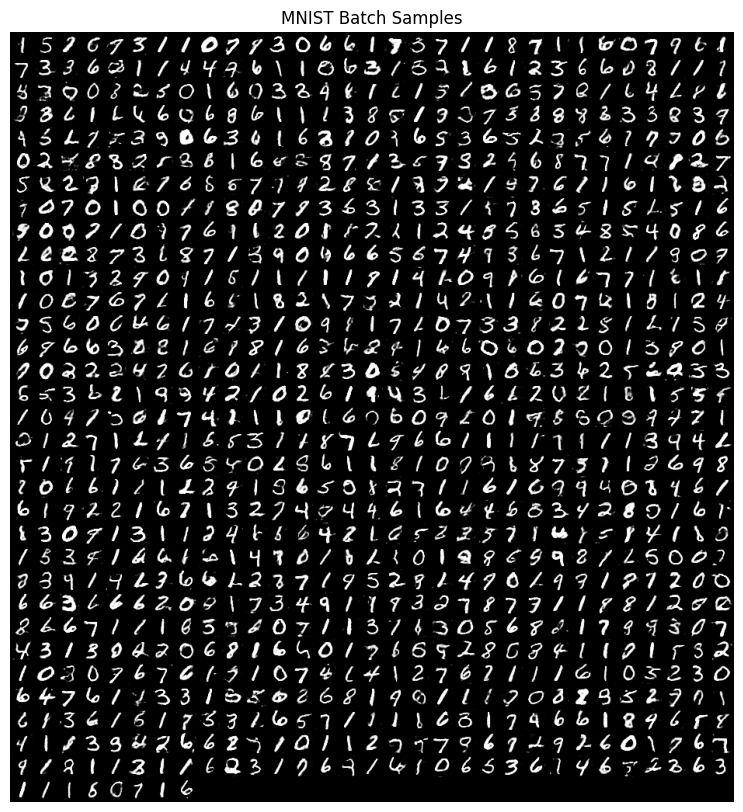

In [26]:
gen_images_dia = generate_BasicGAN(diaG, num_samples=1000, plotit=True)

In [27]:
results["DiaGAN"] = evaluate_gan(gen_images_dia, classifier, real_data=X_mnist[:1000])
results["DiaGAN"]

C:\Users\sarpg\OneDrive\Masaüstü\Generative Neural Networks\DiaGAN-Project\src\evaluation\evaluate_BasicGAN.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(data[i:i+batch_size], dtype=torch.float32, device=device)


{'Precision': np.float64(0.399),
 'Recall': np.float64(0.292),
 'FID': np.float64(228.29774746119435)}

BASIC + DRS

In [28]:
filtered_samples_basic = apply_DRS(
    generator=G,
    real_data=X_mnist,  # shape: (60000, 1, 28, 28)
    z_dim=100,
    num_gen=10000
)

Training auxiliary discriminator for DRS...
[Epoch 1] Aux D Loss: 0.2864
[Epoch 2] Aux D Loss: 0.2212
[Epoch 3] Aux D Loss: 0.1660
[Epoch 4] Aux D Loss: 0.1785
[Epoch 5] Aux D Loss: 0.2057
🎯 DRS Accepted 73/10000 samples (0.73%)


In [29]:

results["BasicGAN + DRS"] = evaluate_gan(filtered_samples_basic, classifier, real_data=X_mnist[:len(filtered_samples_basic)])
results["BasicGAN + DRS"]

{'Precision': np.float64(0.2054794520547945),
 'Recall': np.float64(0.136986301369863),
 'FID': np.float64(762.4243563756339)}

DIA + DRS

In [30]:
filtered_samples_dia = apply_DRS(
    generator=diaG,
    real_data=X_mnist,  # shape: (60000, 1, 28, 28)
    z_dim=100,
    num_gen=10000
)

Training auxiliary discriminator for DRS...
[Epoch 1] Aux D Loss: 0.3455
[Epoch 2] Aux D Loss: 0.2530
[Epoch 3] Aux D Loss: 0.3633
[Epoch 4] Aux D Loss: 0.2646
[Epoch 5] Aux D Loss: 0.3037
🎯 DRS Accepted 145/10000 samples (1.45%)


In [31]:
results["DiaGAN + DRS"] = evaluate_gan(filtered_samples_dia, classifier, real_data=X_mnist[:len(filtered_samples_dia)])
results["DiaGAN + DRS"]

{'Precision': np.float64(0.1793103448275862),
 'Recall': np.float64(0.1793103448275862),
 'FID': np.float64(546.7180677532102)}